## 군집분석

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Mall_Customers.csv', encoding = 'utf-8')
data.head()

,ID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = data[data.columns[3:5]]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
wcss = []

for i in range(1, 21) :
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_transform(X)
    wcss.append(kmeans.inertia_)
    
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.343617936593,
 25030.38309852033,
 21850.165282585633,
 19657.783608703954,
 17636.64997270032,
 15808.588580096646,
 14315.475420984243,
 13402.357540339775,
 11715.457145047934,
 10830.539381932409,
 10147.618121743984,
 9491.126093592397,
 8878.869158619158,
 8186.019523596755]

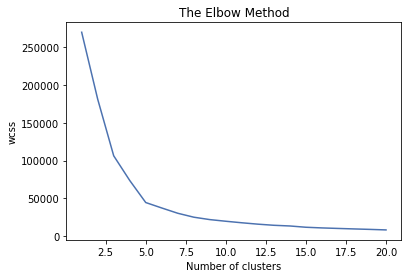

In [8]:
plt.figure()
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
k = 5
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [11]:
Group_cluster = pd.DataFrame(y_kmeans)
Group_cluster.columns = ['Group']
full_data = pd.concat([data, Group_cluster], axis = 1)
full_data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,3


In [14]:
kmeans_pred = KMeans(n_clusters = k, random_state = 42).fit(X)
kmeans_pred.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [15]:
kmeans_pred.predict([[100, 50], [30, 80]])

array([4, 3])

In [16]:
labels = [('Cluster ' + str(i+1)) for i in range(k)]

In [17]:
labels

['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

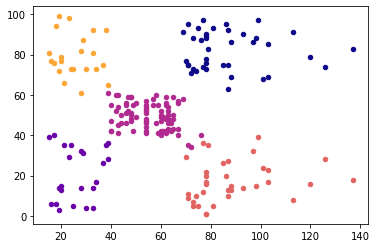

In [25]:
X = np.array(X)
plt.figure()
for i in range(k) :
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 20, 
                c = cmap(i/k), label = labels[i])

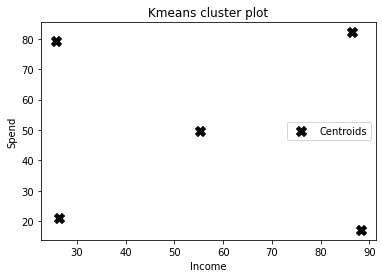

In [26]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids', marker = 'X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

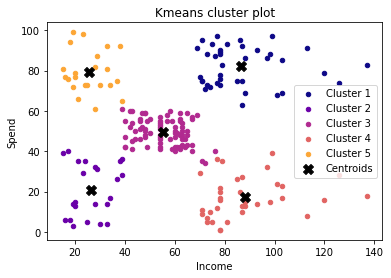

In [27]:
plt.figure()
for i in range(k) :
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 20, c = cmap(i/k), label = labels[i])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids', marker = 'X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

k-mean clustering

In [28]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
x_iris = iris.drop(['class'], axis = 1)
y_iris = iris["class"]
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
x_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(x_iris)
x_scale = scale.transform(x_iris)
pd.DataFrame(x_scale)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [34]:
K = range(1, 10)
KM = [KMeans(n_clusters = k).fit(x_scale) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [35]:
D_K = [cdist(x_iris, centrds, 'euclidean') for centrds in centroids]
D_K

[array([[ 5.66794352],
        [ 5.24273134],
        [ 5.1599962 ],
        [ 5.06084051],
        [ 5.64123135],
        [ 6.18169675],
        [ 5.20197705],
        [ 5.54938228],
        [ 4.77103436],
        [ 5.31661922],
        [ 6.03979972],
        [ 5.4058867 ],
        [ 5.1636739 ],
        [ 4.69816711],
        [ 6.4910138 ],
        [ 6.67413021],
        [ 6.11452624],
        [ 5.66427649],
        [ 6.37381686],
        [ 5.84867626],
        [ 5.92162583],
        [ 5.78993021],
        [ 5.2669261 ],
        [ 5.61480555],
        [ 5.4765928 ],
        [ 5.36688577],
        [ 5.5631842 ],
        [ 5.76769701],
        [ 5.69804144],
        [ 5.21680155],
        [ 5.24758144],
        [ 5.87788819],
        [ 6.11235506],
        [ 6.38731457],
        [ 5.31661922],
        [ 5.39646669],
        [ 5.98716418],
        [ 5.31661922],
        [ 4.80504419],
        [ 5.63204252],
        [ 5.56626293],
        [ 4.55587387],
        [ 4.9145481 ],
        [ 5

In [37]:
cIdx = [np.argmin(D, axis = 1) for D in D_K]
dist = [np.min(D, axis = 1) for D in D_K]
avgwithinSS = [sum(d)/x_scale.shape[0] for d in dist]

In [38]:
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(x_scale)**2)/x_scale.shape[0]
bss = tss = wcss

Text(0, 0.5, 'Average within-cluster sum of squares')

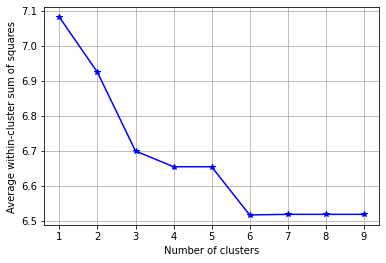

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgwithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')

TypeError: unsupported operand type(s) for /: 'list' and 'list'

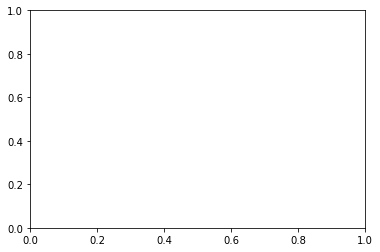

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Percentage of variance explained')

In [44]:
import numpy as np
w, v = np.linalg.eig(np.array([[0.91335, 0.75969], [0.75969, 0.69702]]))
print("\nEigen Values\n", w)
print("\nEigen Vectors\n", v)


Eigen Values
 [1.57253666 0.03783334]

Eigen Vectors
 [[ 0.75530088 -0.6553782 ]
 [ 0.6553782   0.75530088]]


In [45]:
k_means_fit = KMeans(n_clusters = 4, max_iter = 300)
k_means_fit.fit(x_scale)

KMeans(n_clusters=4)

In [48]:
k_means_fit.cluster_centers_

array([[0.54166667, 0.375     , 0.65657789, 0.64186508],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.73850575, 0.47270115, 0.82291058, 0.86350575],
       [0.35632184, 0.23706897, 0.50905903, 0.47126437]])

In [49]:
print("\nK-Means Clustering - Confusion Matrix\n\n", pd.crosstab(y_iris, k_means_fit.labels_, rownames = ["Actuall"], 
                                                                 colnames = ["Predicted"]))


K-Means Clustering - Confusion Matrix

 Predicted         0   1   2   3
Actuall                        
Iris-setosa       0  50   0   0
Iris-versicolor  23   0   0  27
Iris-virginica   19   0  29   2


In [50]:
print("\nSilhouette-score: %0.3f" % silhouette_score(x_iris, k_means_fit.labels_, metric = 'euclidean'))


Silhouette-score: 0.478


In [51]:
for k in range(2, 10) :
    k_means_fitk = KMeans(n_clusters = k, max_iter = 300)
    k_means_fitk.fit(x_iris)
    print("For k value",k,"silhouette-score : %0.3f" %
         silhouette_score(x_iris, k_means_fitk.labels_, metric = 'euclidean'))

For k value 2 silhouette-score : 0.681
For k value 3 silhouette-score : 0.553
For k value 4 silhouette-score : 0.498
For k value 5 silhouette-score : 0.491
For k value 6 silhouette-score : 0.369
For k value 7 silhouette-score : 0.358
For k value 8 silhouette-score : 0.353
For k value 9 silhouette-score : 0.345


계층적 군집분석

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')

In [53]:
import scipy.cluster.hierarchy as sch

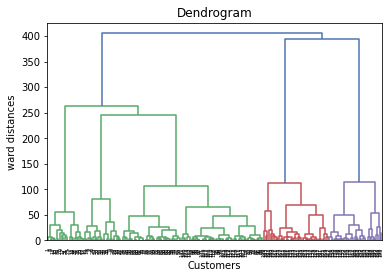

In [54]:
plt.figure(1)
z = sch.linkage(x, method = "ward")
dendrogram = sch.dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ward distances')
plt.show()

In [55]:
k = 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = 'ward')
y_hc = hc.fit_predict(x)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

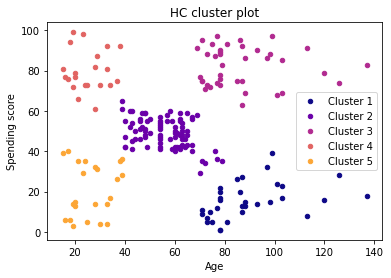

In [56]:
labels = [('Cluster ' + str(i+1)) for i in range(k)]
plt.figure(2)
for i in range(k) :
    plt.scatter(x[y_hc == i, 0], x[y_hc == i, 1], s = 20, c = cmap(i/k), label = labels[i])
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('HC cluster plot')
plt.legend()
plt.show()

## DBSCAN

In [66]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
iris_data = iris[iris.columns[0:4]]
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5, metric = 'euclidean', min_samples = 5)
dbscan

DBSCAN()

In [60]:
dbscan.fit(iris_data)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [61]:
pred = dbscan.fit_predict(iris_data)
pred = pd.DataFrame(pred)
pred.columns = ['predict']
pred.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [62]:
match_data = pd.concat([iris, pred], axis = 1)
match_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [63]:
cross = pd.crosstab(match_data['class'], match_data['predict'])
cross

predict,-1,0,1
class,,,
Iris-setosa,1,49,0
Iris-versicolor,6,0,44
Iris-virginica,10,0,40


In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(iris_data)
pca_2d = pca.transform(iris_data)

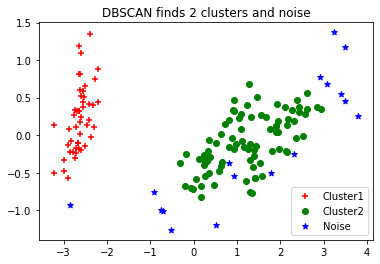

In [68]:
for i in range(0, pca_2d.shape[0]) :
    if dbscan.labels_[i] == 0 :
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='r', marker = '+')
    elif dbscan.labels_[i] == 1 :
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='g', marker = 'o')
    elif dbscan.labels_[i] == -1 :
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker = '*')
plt.legend([c1, c2, c3], ['Cluster1', 'Cluster2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()